# Data analyse CL


#### Packages

In [1]:
#Import packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import tarfile
import io
import csv
import pandas as pd
# import netCDF4
# import h5netcdf
# import glob
import datetime

#### Functions

In [2]:
#Function to read (csv) data file
def read_data(filename):
    headers = ['lon','lat','type','r','z']
    df = pd.read_csv(filename,skiprows=1,names= headers,delim_whitespace=True)
    return df

In [3]:
#Function to read (nc) data file
def nc_read(directory):
    data = xr.open_mfdataset(directory)
    return data

In [4]:
#Read data from the coordinates of the wind turbines
turbines = read_data("E:\data\wind_turbine_coordinates_2020_2050.tab")

In [5]:
#Importing the mask of wind turbines 901
directory_mask = "C:/Users/esmer/OneDrive/TN jaar 3/BEP/mask.nc"
mask = nc_read(directory_mask)

In [6]:
#Importing the mask of wind turbines 900 and 901
directory_mask = "C:/Users/esmer/OneDrive/TN jaar 3/BEP/mask_type900901.nc"
mask_type900901 = nc_read(directory_mask)

In [37]:
#The height
directory = "E:/data/german_bight/phi.Slev.fp.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.20200101.1hr.nc"
phi = nc_read(directory) #Geopotential per height
phimean = phi.mean(dim="time") #Taking the mean of the geopotential over the entire year
phimeanlonlat = phimean.mean(dim=["x","y"]) #Taking the mean of the geopotential over the longitude and latitude
height = phimeanlonlat.phi.values/9.81 #Dividing the geopotential by 9.81 to determine the true height
height = np.sort(height)

## CL: cloud area fraction for different heights

## Plotting the cloud fraction for different heights for WFP and CTL

#### Selecting seasons from data

In [9]:
#Array for the different directories
#Months
directory1 = ["E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202001*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202002*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202003*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202004*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202005*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202006*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202007*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202008*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202009*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202010*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202011*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202012*.1hr.nc"]
directory2 = ["E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202001*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202002*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202003*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202004*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202005*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202006*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202007*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202008*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202009*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202010*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202011*.1hr.nc",
             "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202012*.1hr.nc",]

The array CTL defines the directories that correspond with spring, summer, autumn and winter in the directories without wind farms (CTL) and the array WFP defines the directories that correspond with spring, summer, autumn and winter in the directories with wind farms (WFP).

In [60]:
#Array for different seasons
#Without WFP
CTL = {}
CTL["spring"] = []
CTL["summer"] = []
CTL["autumn"] = []
CTL["winter"] = []

for i in range(2,5):
    CTL["spring"] = np.append(CTL["spring"],directory1[i])
for i in range(5,8):
    CTL["summer"] = np.append(CTL["summer"],directory1[i])
for i in range(8,11):
    CTL["autumn"] = np.append(CTL["autumn"],directory1[i])
for i in [11,0,1]:
    CTL["winter"] = np.append(CTL["winter"],directory1[i])

    
#With WFP    
WFP = {}
WFP["spring"] = []
WFP["summer"] = []
WFP["autumn"] = []
WFP["winter"] = []

for i in range(2,5):
    WFP["spring"] = np.append(WFP["spring"],directory2[i])
for i in range(5,8):
    WFP["summer"] = np.append(WFP["summer"],directory2[i])
for i in range(8,11):
    WFP["autumn"] = np.append(WFP["autumn"],directory2[i])
for i in [11,0,1]:
    WFP["winter"] = np.append(WFP["winter"],directory2[i])

#### Defining the data of the seasons in an xarray

Now we want to abstract the data from the directories for spring, summer, autumn and winter. WFP and CTL arrays are overwritten with the data rather than the directories.

In [12]:
#Selecting the different months of data for CL in one array
seasons = ["spring", "summer", "autumn", "winter"]

for season in seasons: #We loop over the different seasons per season
    print(season)
    _wfp = [] #temporary array for combining monthly data of WFP
    _ctl = [] #temporary array for combining monthly data of CTL
    for data in WFP[season]: #Appending the data read from the different directories in the seasons
        _wfp.append(nc_read(data)) #WFP
    for data in CTL[season]:
        _ctl.append(nc_read(data)) #CTL
    combined_wfp = xr.concat(_wfp, dim='time') #Combine the data of WFP
    combined_ctl = xr.concat(_ctl, dim='time') #Combine the data of CTL
    WFP[season] = combined_wfp.mean(dim='time') #Taking the mean over the days in the season
    CTL[season] = combined_ctl.mean(dim='time') #Taking the mean over the days in the season
    
#Now WFP gives the data in an xarray for the different seasons
#Now CTL gives the data in an xarray for the different seasons

spring
summer
autumn
winter


## Wind turbines type 900 and 901

#### Loading the data

In [13]:
seasons = ["spring", "summer", "autumn", "winter"]

for season in seasons:
    WFP[season].load()

for season in seasons:
    CTL[season].load()

KeyboardInterrupt: 

#### Calculation of the average of CL for the different heights for the different seasons over only the wind turbines of type 901.

In [ ]:
#Selecting the different months of data for CL in one array
seasons = ["spring", "summer", "autumn", "winter"]
    
avgcl_wfp = {}
avgcl_wfp["spring"] = []
avgcl_wfp["summer"] = []
avgcl_wfp["autumn"] = []
avgcl_wfp["winter"] = []

avgcl_ctl = {}
avgcl_ctl["spring"] = []
avgcl_ctl["summer"] = []
avgcl_ctl["autumn"] = []
avgcl_ctl["winter"] = []

for season in seasons: #Nu gaan we over de verschillende seizoenen loopen, beginnend bij de lente, zomer, herfst, winter
    _wfp = [] #array met de average CL per level WFP
    _ctl = [] #array met de average CL per level CTL
    for i in range(65): #Nu gaan we over de verschillende levels loopen
        WFPlevels = WFP[season].isel(lev=64-i) #Define levels, beginnend bij laagste hoogte (hoogste z) naar hoog
        maskwfp = WFPlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values #waarden bij windturbine 900 en 901 bepalen
        sumCLwfp = np.sum(maskwfp) #som CL WFP bij windturbine 900 en 901
        sumturbines = np.sum(mask.__xarray_dataarray_variable__.values)
        avgCLwfp = sumCLwfp/sumturbines
        _wfp.append(avgCLwfp) #Dan hebben we voor een bepaald seizoen een array met alle levels en alle avg CL
        
        CTLlevels = CTL[season].isel(lev=64-i)
        maskctl = CTLlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values
        sumCLctl = np.sum(maskctl)
        avgCLctl = sumCLctl/sumturbines
        _ctl.append(avgCLctl)
    avgcl_wfp[season].append(_wfp)
    avgcl_ctl[season].append(_ctl)


#### Saving the averages in a csv file

In [47]:
for season in seasons:
    pd.Series(avgcl_wfp[season][0]).to_csv(f"avgcl900901_wfp_{season}.csv")
    pd.Series(avgcl_ctl[season][0]).to_csv(f"avgcl900901_ctl_{season}.csv")

KeyError: 'spring'

#### Opening the files

In [63]:
#CTL
CLspringCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_ctl_spring.csv", index_col=0)
CLsummerCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_ctl_summer.csv", index_col=0)
CLautumnCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_ctl_autumn.csv", index_col=0)
CLwinterCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_ctl_winter.csv", index_col=0)

#WFP
CLspringWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_wfp_spring.csv", index_col=0)
CLsummerWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_wfp_summer.csv", index_col=0)
CLautumnWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_wfp_autumn.csv", index_col=0)
CLwinterWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/avgcl900901_wfp_winter.csv", index_col=0)

#### Determining the height per CL

In [15]:
#Determine the height
directory = "E:/data/german_bight/phi.Slev.fp.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.20200101.1hr.nc"
phi = nc_read(directory) #Geopotential per height
phimean = phi.mean(dim="time") #Taking the mean of the geopotential over the entire year
phimeanlonlat = phimean.mean(dim=["x","y"]) #Taking the mean of the geopotential over the longitude and latitude
height = phimeanlonlat.phi.values/9.81 #Dividing the geopotential by 9.81 to determine the true height
height = np.sort(height)

array([1.75019760e+01, 4.17670250e+01, 6.64138947e+01, 9.18722458e+01,
       1.18542923e+02, 1.46796036e+02, 1.76985168e+02, 2.09453491e+02,
       2.44538788e+02, 2.82578156e+02, 3.23917511e+02, 3.68923248e+02,
       4.17969269e+02, 4.71440216e+02, 5.29757385e+02, 5.93382874e+02,
       6.62798889e+02, 7.38465088e+02, 8.20813477e+02, 9.10288818e+02,
       1.00735693e+03, 1.11248669e+03, 1.22618286e+03, 1.34901086e+03,
       1.48175122e+03, 1.62516162e+03, 1.77955566e+03, 1.94494507e+03,
       2.12136890e+03, 2.30890112e+03, 2.50764844e+03, 2.71772266e+03,
       2.93922681e+03, 3.17226978e+03, 3.41698145e+03, 3.67351172e+03,
       3.94203003e+03, 4.22274756e+03, 4.51596289e+03, 4.82206787e+03,
       5.14152051e+03, 5.47478809e+03, 5.82227393e+03, 6.18441406e+03,
       6.56178125e+03, 6.95505908e+03, 7.36506250e+03, 7.79265771e+03,
       8.23865137e+03, 8.70400098e+03, 9.19005957e+03, 9.69857129e+03,
       1.02316631e+04, 1.07917598e+04, 1.13815479e+04, 1.20078994e+04,
      

#### Plot of the height vs average CL per height

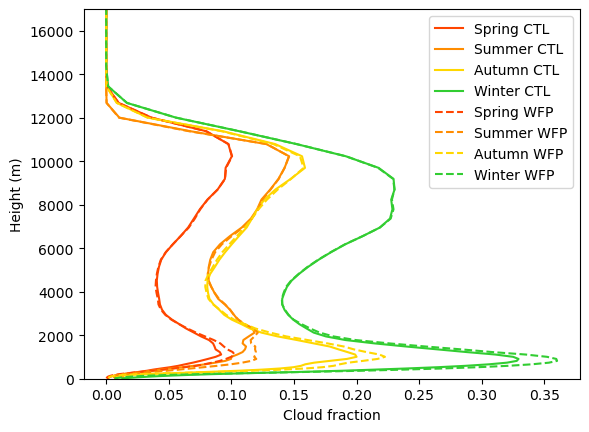

In [65]:
plt.plot(CLspringCTL,height,label="Spring CTL", color="orangered")
plt.plot(CLsummerCTL,height,label="Summer CTL",color="darkorange")
plt.plot(CLautumnCTL,height,label="Autumn CTL", color="gold")
plt.plot(CLwinterCTL,height,label="Winter CTL", color="limegreen")
plt.plot(CLspringWFP,height,label="Spring WFP", color="orangered",linestyle='dashed')
plt.plot(CLsummerWFP,height,label="Summer WFP", color="darkorange", linestyle='dashed')
plt.plot(CLautumnWFP,height,label="Autumn WFP", color="gold", linestyle='dashed')
plt.plot(CLwinterWFP,height,label="Winter WFP", color="limegreen", linestyle='dashed')
plt.legend()
plt.ylim(0,17000)
plt.xlabel("Cloud fraction")
plt.ylabel("Height (m)")
# plt.title('The average cloud fraction above wind turbines of type 900 and 901')
plt.savefig('CL900901.jpg',dpi=300) #save the figure
plt.show()

## Difference in CL per height

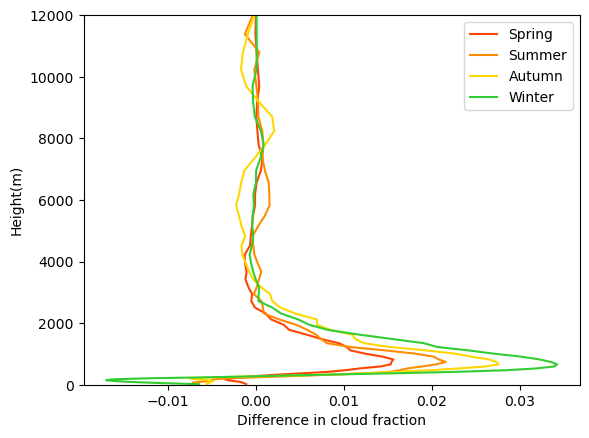

In [101]:
CLspring = CLspringWFP-CLspringCTL
CLsummer = CLsummerWFP-CLsummerCTL
CLautumn = CLautumnWFP-CLautumnCTL
CLwinter = CLwinterWFP-CLwinterCTL
plt.plot(CLspring,height,label="Spring", color="orangered")
plt.plot(CLsummer,height,label="Summer",color="darkorange")
plt.plot(CLautumn,height,label="Autumn", color="gold")
plt.plot(CLwinter,height,label="Winter", color="limegreen")
plt.legend()
plt.ylim(0,12000)
plt.xlabel("Difference in cloud fraction")
plt.ylabel("Height(m)")
# plt.title('The difference in average cloud fraction')
plt.savefig('diffCL900901.jpg',dpi=300) #save the figure
plt.show()

In [70]:
np.where(CLwinter == np.max(CLwinter))
# height[16]

C:\Programs\Anaconda3\envs\bep\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


(array([16], dtype=int64), array([0], dtype=int64))

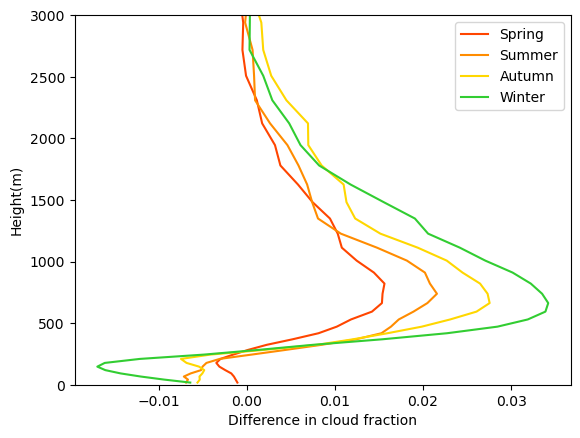

In [98]:
CLspring = CLspringWFP-CLspringCTL
CLsummer = CLsummerWFP-CLsummerCTL
CLautumn = CLautumnWFP-CLautumnCTL
CLwinter = CLwinterWFP-CLwinterCTL
plt.plot(CLspring,height,label="Spring", color="orangered")
plt.plot(CLsummer,height,label="Summer",color="darkorange")
plt.plot(CLautumn,height,label="Autumn", color="gold")
plt.plot(CLwinter,height,label="Winter", color="limegreen")
plt.plot
plt.legend()
plt.ylim(0,3000)
plt.xlabel("Difference in cloud fraction")
plt.ylabel("Height(m)")
# plt.title('Average difference in CL above type 900 and 901')
plt.savefig('zoomeddiffCL900901.jpg',dpi=300) #save the figure
plt.show()


## The maximum and minimum delta CF and height per season

#### Calculate the minimum and index to determine the height of the minimum

In [106]:
CLminimum = [np.min(CLspring),np.min(CLsummer),np.min(CLautumn),np.min(CLwinter)]
CLminimum = np.array(CLminimum)

array([[-0.0034899 ],
       [-0.00717801],
       [-0.0075061 ],
       [-0.01700872]])

In [107]:
indexminspring = np.where(CLspring == CLminimum[0])
indexminsummer = np.where(CLsummer == CLminimum[1])
indexminautumn = np.where(CLautumn == CLminimum[2])
indexminwinter = np.where(CLwinter == CLminimum[3])

In [108]:
heightmin = [height[indexminspring[0][0]],height[indexminsummer[0][0]],height[indexminautumn[0][0]],height[indexminwinter[0][0]]]
heightmin = np.array(heightmin)

#### Plot the minimum and height against the seasons

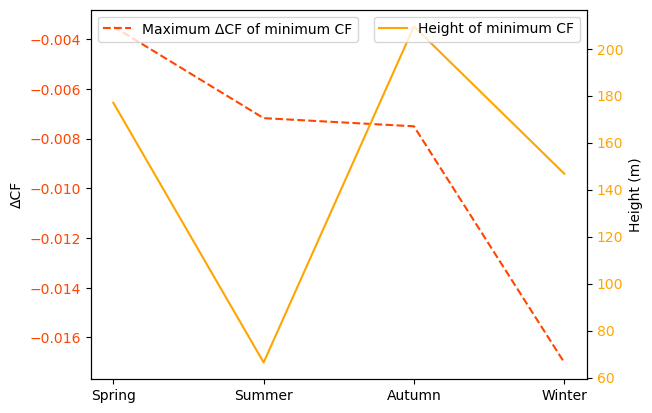

In [110]:
seasons = ["Spring","Summer","Autumn","Winter"]
seasons = np.array(seasons)

fig, ax = plt.subplots()

ax.plot(seasons,CLminimum,label="Maximum ΔCF of minimum CF",color='orangered',linestyle='dashed')
ax.tick_params(axis='y', labelcolor='orangered')
ax2 = ax.twinx()

ax2.plot(seasons,heightmin, color='orange',label='Height of minimum CF')
ax2.tick_params(axis='y', labelcolor='orange')

ax.set_ylabel("ΔCF")
ax2.set_ylabel("Height (m)")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# ax.set_xlabel()
# plt.title("Difference in maximum CL and height")

plt.savefig('mindiffCLseasons.jpg',dpi=300) #save the figure

#### Calculation of the maximum, index and height

In [91]:
CLmaximum = [np.max(CLspring),np.max(CLsummer),np.max(CLautumn),np.max(CLwinter)]
CLmaximum = np.array(CLmaximum)
CLmaximum

C:\Programs\Anaconda3\envs\bep\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


array([[0.01561187],
       [0.0215712 ],
       [0.02755757],
       [0.03421349]])

In [92]:
indexmaxspring = np.where(CLspring == CLmaximum[0])
indexmaxsummer = np.where(CLsummer == CLmaximum[1])
indexmaxautumn = np.where(CLautumn == CLmaximum[2])
indexmaxwinter = np.where(CLwinter == CLmaximum[3])

In [94]:
heightmax = [height[indexmaxspring[0][0]],height[indexmaxsummer[0][0]],height[indexmaxautumn[0][0]],height[indexmaxwinter[0][0]]]
heightmax = np.array(heightmax)

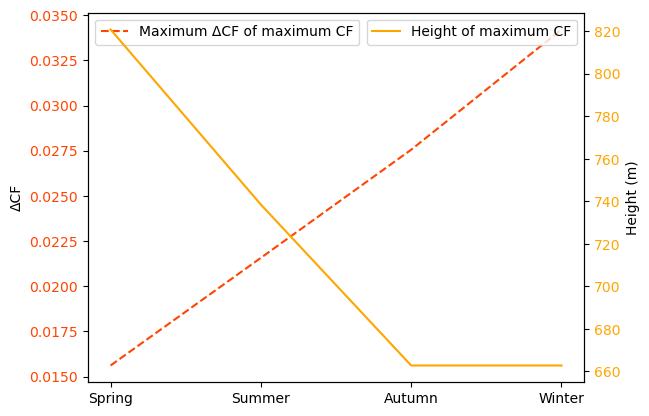

In [104]:
seasons = ["Spring","Summer","Autumn","Winter"]
seasons = np.array(seasons)

fig, ax = plt.subplots()

ax.plot(seasons,CLmaximum,label="Maximum ΔCF of maximum CF",color='orangered',linestyle='dashed')
ax.tick_params(axis='y', labelcolor='orangered')
ax2 = ax.twinx()

ax2.plot(seasons,heightmax, color='orange',label='Height of maximum CF')
ax2.tick_params(axis='y', labelcolor='orange')

ax.set_ylabel("ΔCF")
ax2.set_ylabel("Height (m)")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# ax.set_xlabel()
# plt.title("Difference in maximum CL and height")

plt.savefig('maxdiffCLseasons.jpg',dpi=300) #save the figure

# Analyseren plotjes

In [9]:
#Max CL per season
#Height where CL is max
seasons = ["spring", "summer", "autumn", "winter"]
CLspring = np.array(CLspring)
np.where(height < 3000)
height[:33]
CLstd = CLspring[:33]

CLarrayspring = np.array(CLspring)
CLarraysummer = np.array(CLsummer)
CLarrayautumn = np.array(CLautumn)

CLmaximum = []
heightmaximum = []
for season in seasons:
    height = height[:33] #the height for which the difference in cloud fraction is the greatest, below 3000 m
    CL = np.array(avgcl_wfp[season]) - np.array(avgcl_ctl[season])
    CL = CL[:33]
    CL = np.array(CL)
    CLmax = np.max(CL)
    CLmaximum.append(CLmax)
    indexmax = np.where(CL == np.max(CL))
    heightmax = height[int(indexmax[1])]
    heightmaximum.append(heightmax)
    
print(CLmaximum)
print(heightmaximum)
    


NameError: name 'CLspring' is not defined

In [ ]:
CLspring = np.array(CLspring)
CLspring.shape
CLspring
np.where(height < 3000)
height[:33]
CLstd = CLspring[:33]

In [ ]:
np.where(CL==np.max(CL))

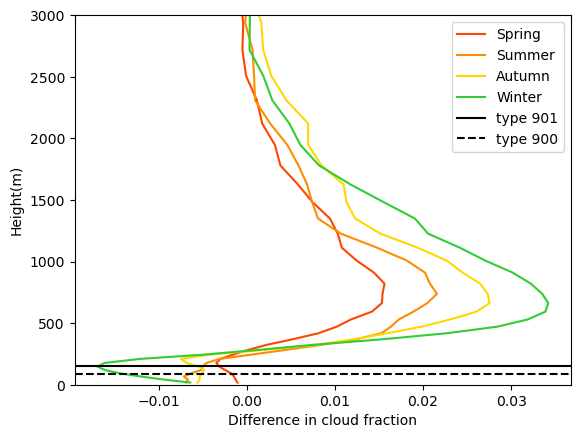

In [99]:
CLspring = CLspringWFP-CLspringCTL
CLsummer = CLsummerWFP-CLsummerCTL
CLautumn = CLautumnWFP-CLautumnCTL
CLwinter = CLwinterWFP-CLwinterCTL
plt.plot(CLspring,height,label="Spring", color="orangered")
plt.plot(CLsummer,height,label="Summer",color="darkorange")
plt.plot(CLautumn,height,label="Autumn", color="gold")
plt.plot(CLwinter,height,label="Winter", color="limegreen")
plt.ylim(0,3000)
plt.xlabel("Difference in cloud fraction")
plt.ylabel("Height(m)")
# plt.title('The average difference in cloud fraction above wind turbines of type 900 and 901')
plt.axhline(y = 150, color = 'k', linestyle = '-',label="type 901")
plt.axhline(y = 89, color = 'k', linestyle = '--', label="type 900")
plt.legend()
plt.savefig('zoomeddiffCL900901.jpg',dpi=300) #save the figure
plt.show()

In [ ]:
# plt.plot(seasons,CLmaximum)
plt.plot(seasons,heightmaximum)

In [ ]:
fig, ax = plt.subplots()

ax.plot(seasons,CLmaximum,label="Maximum CL",color='red')
ax.tick_params(axis='y', labelcolor='red')
ax2 = ax.twinx()

ax2.plot(seasons,heightmaximum, color='green')
ax2.tick_params(axis='y', labelcolor='green')

ax.set_ylabel("Difference in cloud fraction between WFP and CTL")
ax2.set_ylabel("Height (m)")
ax.set_xlabel("Seasons")

# Analyse voor maanden in seizoen

In de plot hierboven is te zien dat de difference in cloud fraction tussen wel en geen windmolenparken toeneemt van spring t/m winter. Dit suggereert dat het verschil van de maanden afhangt. Ook verandert de hoogte van de wolkenvorming. Om dit verder uit te zoeken gaan we naar de 12 maanden kijken.

#### Loading the directories per months

In [10]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
CTL = {}
WFP ={}
i = 0 
for month in months:
    CTL[month] = []
    WFP[month] = []
    CTL[month].append(directory1[i])
    WFP[month].append(directory2[i])
    i += 1

#### Loading the data into the months

In [11]:
#Selecting the different months of data for CL in one array


for month in months: #We loop over the different seasons per season
    print(month)
    _wfp = [] #temporary array for combining monthly data of WFP
    _ctl = [] #temporary array for combining monthly data of CTL
    for data in WFP[month]: #Appending the data read from the different directories in the seasons
        _wfp.append(nc_read(data)) #WFP
    for data in CTL[month]:
        _ctl.append(nc_read(data)) #CTL
    combined_wfp = xr.concat(_wfp, dim='time') #Combine the data of WFP
    combined_ctl = xr.concat(_ctl, dim='time') #Combine the data of CTL
    WFP[month] = combined_wfp.mean(dim='time') #Taking the mean over the days in the season
    CTL[month] = combined_ctl.mean(dim='time') #Taking the mean over the days in the season
    
#Now WFP gives the data in an xarray for the different seasons
#Now CTL gives the data in an xarray for the different seasons

January
February
March
April
May
June
July
August
September
October
November
December


#### Loading the data

In [12]:
for month in months:
    print(month)
    WFP[month].load()

January
February
March
April
May
June
July
August
September
October
November
December


In [13]:
for month in months:
    print(month)
    CTL[month].load()

January
February
March
April
May
June
July
August
September
October
November
December


#### Calculation of the average CL over the months over one turbine of type 900 or 901 with and without wind turbines

In [27]:
# #Selecting the different months of data for CL in one array
avgcl_wfp = {}
avgcl_ctl = {}

for month in months:
    avgcl_wfp[month] = []
    _wfp = []
    
    avgcl_ctl[month] = []
    _ctl = []
    for i in range(65):
        WFPlevels = WFP[month].isel(lev=64-i)
        maskwfp = WFPlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values
        sumCLwfp = np.sum(maskwfp)
        sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
        avgCLwfp = sumCLwfp/sumturbines
        _wfp.append(avgCLwfp)
        
        CTLlevels = CTL[month].isel(lev=64-i)
        maskctl = CTLlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values
        sumCLctl = np.sum(maskctl)
        avgCLctl = sumCLctl/sumturbines
        _ctl.append(avgCLctl)
    avgcl_wfp[month].append(_wfp)
    avgcl_ctl[month].append(_ctl)

#### Save in a csv file

In [32]:
for month in months:
    pd.Series(avgcl_wfp[month][0]).to_csv(f"windfarm_avgcl_wfp_{month}.csv")
    pd.Series(avgcl_ctl[month][0]).to_csv(f"windfarm_avgcl_ctl_{month}.csv")

#### Opening the files

In [70]:
# #CTL
# CLjanCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_January.csv", index_col=0)
# CLfebCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_February.csv", index_col=0)
# CLmarCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_March.csv", index_col=0)
# CLaprCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_April.csv", index_col=0)
# CLmayCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_May.csv", index_col=0)
# CLjunCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_June.csv", index_col=0)
# CLjulCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_July.csv", index_col=0)
# CLaugCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_August.csv", index_col=0)
# CLseptCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_September.csv", index_col=0)
# CLoctCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_October.csv", index_col=0)
# CLnovCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_November.csv", index_col=0)
# CLdecCTL = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_ctl_December.csv", index_col=0)

# #WFP
# CLjanWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_January.csv", index_col=0)
# CLfebWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_February.csv", index_col=0)
# CLmarWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_March.csv", index_col=0)
# CLaprWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_April.csv", index_col=0)
# CLmayWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_May.csv", index_col=0)
# CLjunWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_June.csv", index_col=0)
# CLjulWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_July.csv", index_col=0)
# CLaugWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_August.csv", index_col=0)
# CLseptWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_September.csv", index_col=0)
# CLoctWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_October.csv", index_col=0)
# CLnovWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_November.csv", index_col=0)
# CLdecWFP = pd.read_csv("C:/Users/esmer/OneDrive/TN jaar 3/BEP/Python csv/Average CL months/windfarm_avgcl_wfp_December.csv", index_col=0)

#### Plot CL per month

In [121]:
# plt.plot(CLjanCTL,height,label="January CTL", color="darkred")
# plt.plot(CLfebCTL,height,label="February CTL",color="indianred")
# plt.plot(CLmarCTL,height,label="March CTL", color="orangered")
# plt.plot(CLaprCTL,height,label="April CTL", color="coral")
# plt.plot(CLmayCTL,height,label="May CTL",color="orange")
# plt.plot(CLjunCTL,height,label="June CTL",color="gold")
# plt.plot(CLjulCTL,height,label="July CTL",color="yellow")
# plt.plot(CLaugCTL,height,label="August CTL",color="yellowgreen")
# plt.plot(CLseptCTL,height,label="September CTL",color="olivedrab")
# plt.plot(CLoctCTL,height,label="October CTL",color="green")
# plt.plot(CLnovCTL,height,label="November CTL",color="lightseagreen")
# plt.plot(CLdecCTL,height,label="December CTL", color="mediumslateblue")
# plt.plot(CLjanWFP,height,label="January WFP", color="darkred",linestyle="dashed")
# plt.plot(CLfebWFP,height,label="February WFP",color="indianred",linestyle="dashed")
# plt.plot(CLmarWFP,height,label="March WFP", color="orangered",linestyle="dashed")
# plt.plot(CLaprWFP,height,label="April WFP", color="coral",linestyle="dashed")
# plt.plot(CLmayWFP,height,label="May WFP",color="orange",linestyle="dashed")
# plt.plot(CLjunWFP,height,label="June WFP",color="gold",linestyle="dashed")
# plt.plot(CLjulWFP,height,label="July WFP",color="yellow",linestyle="dashed")
# plt.plot(CLaugWFP,height,label="August WFP",color="yellowgreen",linestyle="dashed")
# plt.plot(CLseptWFP,height,label="September WFP",color="olivedrab",linestyle="dashed")
# plt.plot(CLoctWFP,height,label="October WFP",color="green",linestyle="dashed")
# plt.plot(CLnovWFP,height,label="November WFP",color="lightseagreen",linestyle="dashed")
# plt.plot(CLdecWFP,height,label="December WFP", color="mediumslateblue",linestyle="dashed")
# plt.legend()
# plt.ylim(0,17000)
# plt.xlabel("Cloud fraction")
# plt.ylabel("Height(m)")
# plt.title('The average cloud fraction over a season above wind turbines of type 900 and 901')
# # plt.savefig('CL900901.jpg',dpi=300) #save the figure
# plt.show()

#### Plotting the difference in month vs average CL

In [120]:
# CLjan = CLjanWFP-CLjanCTL
# CLfeb = CLfebWFP-CLfebCTL
# CLmar = CLmarWFP-CLmarCTL
# CLapr = CLaprWFP-CLaprCTL
# CLmay = CLmayWFP-CLmayCTL
# CLjun = CLjunWFP-CLjunCTL
# CLjul = CLjulWFP-CLjulCTL
# CLaug = CLaugWFP-CLaugCTL
# CLsept = CLseptWFP-CLseptCTL
# CLoct = CLoctWFP-CLoctCTL
# CLnov = CLnovWFP-CLnovCTL
# CLdec = CLdecWFP-CLdecCTL
# plt.plot(CLjan,height,label="January", color="darkred")
# plt.plot(CLfeb,height,label="February",color="indianred")
# plt.plot(CLmar,height,label="March", color="orangered")
# plt.plot(CLapr,height,label="April", color="coral")
# plt.plot(CLmay,height,label="May",color="orange")
# plt.plot(CLjun,height,label="June",color="gold")
# plt.plot(CLjul,height,label="July",color="yellow")
# plt.plot(CLaug,height,label="August",color="yellowgreen")
# plt.plot(CLsept,height,label="September",color="olivedrab")
# plt.plot(CLoct,height,label="October",color="green")
# plt.plot(CLnov,height,label="November",color="lightseagreen")
# plt.plot(CLdec,height,label="December", color="mediumslateblue")
# plt.legend()
# plt.ylim(0,17000)
# plt.xlabel("Cloud fraction")
# plt.ylabel("Height(m)")
# plt.title('The difference in average cloud fraction over a month above wind turbines of type 900 and 901')
# # plt.savefig('CL900901.jpg',dpi=300) #save the figure
# plt.show()

#### Calculating the maximum CL and the height of the CL

In [28]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
CLmaximum = []
heightmaximum = []
for month in months:
    height = height[:33] #the height for which the difference in cloud fraction is the greatest, below 3000 m
    CL = np.array(avgcl_wfp[month]) - np.array(avgcl_ctl[month])
    CL = CL[:33]
    CL = np.array(CL)
    CLmax = np.max(CL)
    CLmaximum.append(CLmax)
    indexmax = np.where(CL == np.max(CL))
    heightmax = height[int(indexmax[1])]
    heightmaximum.append(heightmax)
    
print(CLmaximum)
print(heightmaximum)

[0.04344468687180497, 0.0234745989369739, 0.022900243025201897, 0.008855159004118034, 0.014884269647418881, 0.019384940080107396, 0.028842078044915648, 0.01630097707603008, 0.021616301752009973, 0.029587865995753332, 0.028472330653743383, 0.03779332430879023]
[471.44022, 1007.35693, 662.7989, 593.3829, 820.8135, 662.7989, 910.2888, 738.4651, 738.4651, 738.4651, 593.3829, 738.4651]


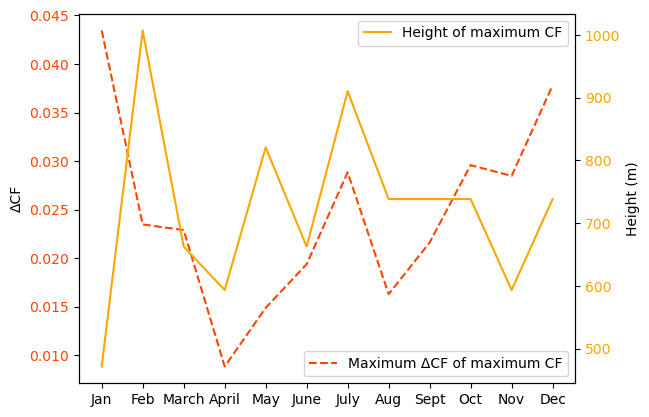

In [29]:
months = ["Jan","Feb","March","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
months = np.array(months)
CLmaximum = np.array(CLmaximum)
heightmaximum = np.array(heightmaximum)

fig, ax = plt.subplots()

ax.plot(months,CLmaximum,label="Maximum ΔCF of maximum CF",color='orangered',linestyle='dashed')
ax.tick_params(axis='y', labelcolor='orangered')
ax2 = ax.twinx()

ax2.plot(months,heightmaximum, color='orange',label='Height of maximum CF')
ax2.tick_params(axis='y', labelcolor='orange')

ax.set_ylabel("ΔCF")
ax2.set_ylabel("Height (m)")
ax.legend(loc='lower right')
ax2.legend(loc='upper right')
# ax.set_xlabel()
# plt.title("Difference in maximum CL and height")

plt.savefig('maxdiffCLmonths.jpg',dpi=300) #save the figure

# Maximum height and peak of CL for December

In [ ]:
directory1 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202012*.1hr.nc"
directory2 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202012*.1hr.nc"

In [17]:
dataCTL = nc_read(directory1)
dataWFP = nc_read(directory2)

In [18]:
daysCTL = []
daysWFP = []
for i in range(1,32):
    dayselCTL = dataCTL.isel(time=(dataCTL.time.dt.day == i))
    dayselmeanCTL = dayselCTL.mean(dim="time")
    daysCTL.append(dayselmeanCTL)
    dayselmeanCTL.load()
    
    dayselWFP = dataWFP.isel(time=(dataWFP.time.dt.day == i))
    dayselmeanWFP = dayselWFP.mean(dim="time")
    dayselmeanWFP.load()
    daysWFP.append(dayselmeanWFP)

#### Calculating the average CL over the levels

In [19]:
avgcl_wfp = {}
avgcl_ctl = {}

for i in range(31):
    avgcl_wfp[i] = []
    _wfp = []
    
    avgcl_ctl[i] = []
    _ctl = []
    for j in range(65):
        WFPlevels = daysWFP[i].isel(lev=64-j)
        maskwfp = WFPlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values
        sumCLwfp = np.sum(maskwfp)
        sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
        avgCLwfp = sumCLwfp/sumturbines
        _wfp.append(avgCLwfp)
        
        CTLlevels = daysCTL[i].isel(lev=64-j)
        maskctl = CTLlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values
        sumCLctl = np.sum(maskctl)
        avgCLctl = sumCLctl/sumturbines
        _ctl.append(avgCLctl)
    avgcl_wfp[i].append(_wfp)
    avgcl_ctl[i].append(_ctl)

#### Maximum height and peak

In [20]:
CLmaximum = []
heightmaximum = []
for i in range(31):
    height = height[:50] #the height for which the difference in cloud fraction is the greatest, below 3000 m
    CL = np.array(avgcl_wfp[i]) - np.array(avgcl_ctl[i])
    CL = CL[:50]
    CL = np.array(CL)
    CLmax = np.max(CL)
    CLmaximum.append(CLmax)
    indexmax = np.where(CL == np.max(CL))
    print(indexmax[1])
    heightmax = height[indexmax[1]]
    
    heightmaximum.append(heightmax)
# print(np.array(heightmaximum))
heightmaximum

[15]
[18]
[20]
[18]
[14]
[13]
[17]
[16]
[18]
[20]
[16]
[17]
[19]
[16]
[16]
[19]
[13]
[22]
[23]
[16]
[13]
[9]
[9]
[11]
[12]
[18]
[18]
[13]
[20]
[13]
[12]


[array([593.3829], dtype=float32),
 array([820.8135], dtype=float32),
 array([1007.35693], dtype=float32),
 array([820.8135], dtype=float32),
 array([529.7574], dtype=float32),
 array([471.44022], dtype=float32),
 array([738.4651], dtype=float32),
 array([662.7989], dtype=float32),
 array([820.8135], dtype=float32),
 array([1007.35693], dtype=float32),
 array([662.7989], dtype=float32),
 array([738.4651], dtype=float32),
 array([910.2888], dtype=float32),
 array([662.7989], dtype=float32),
 array([662.7989], dtype=float32),
 array([910.2888], dtype=float32),
 array([471.44022], dtype=float32),
 array([1226.1829], dtype=float32),
 array([1349.0109], dtype=float32),
 array([662.7989], dtype=float32),
 array([471.44022], dtype=float32),
 array([282.57816], dtype=float32),
 array([282.57816], dtype=float32),
 array([368.92325], dtype=float32),
 array([417.96927], dtype=float32),
 array([820.8135], dtype=float32),
 array([820.8135], dtype=float32),
 array([471.44022], dtype=float32),
 array

In [21]:
reverse_order_height = np.sort(heightmaximum)[::-1]
print(reverse_order_height)
reverse_order_peak = np.sort(CLmaximum)[::-1]
print(reverse_order_peak)

indexmax = np.where(np.array(CLmaximum)>0.08)
# print(CLmaximum)
# indexmax
np.mean(heightmaximum)
# heightmaximum

[[ 417.96927]
 [ 471.44022]
 [1007.35693]
 [ 471.44022]
 [ 820.8135 ]
 [ 820.8135 ]
 [ 417.96927]
 [ 368.92325]
 [ 282.57816]
 [ 282.57816]
 [ 471.44022]
 [ 662.7989 ]
 [1349.0109 ]
 [1226.1829 ]
 [ 471.44022]
 [ 910.2888 ]
 [ 662.7989 ]
 [ 662.7989 ]
 [ 910.2888 ]
 [ 738.4651 ]
 [ 662.7989 ]
 [1007.35693]
 [ 820.8135 ]
 [ 662.7989 ]
 [ 738.4651 ]
 [ 471.44022]
 [ 529.7574 ]
 [ 820.8135 ]
 [1007.35693]
 [ 820.8135 ]
 [ 593.3829 ]]
[0.26876722 0.21532504 0.16108739 0.13441515 0.12848867 0.10795929
 0.09396427 0.08525072 0.07599396 0.07287552 0.07263331 0.06974926
 0.06881789 0.06624331 0.06106438 0.06014855 0.06012161 0.05774366
 0.05487159 0.04569076 0.04351491 0.04317663 0.0360544  0.03041453
 0.0270268  0.02541232 0.02427399 0.02222037 0.01291395 0.01068822
 0.00627719]


695.58673

In [22]:
indexmax = np.where(np.array(CLmaximum)>0.08)
print(indexmax)
CLmaximum

(array([ 4,  5, 12, 20, 22, 23, 24, 26], dtype=int64),)


[0.022220374562830963,
 0.03605439530056753,
 0.04317662920446913,
 0.03041452959084967,
 0.12848866521990726,
 0.16108739291596566,
 0.04569076072175504,
 0.02541231599999222,
 0.07263331052603994,
 0.0610643820418193,
 0.027026800739513634,
 0.06624331028218483,
 0.08525071681779661,
 0.010688220011960181,
 0.012913947297125888,
 0.006277187431229104,
 0.060121607766219776,
 0.05774366263608646,
 0.024273993784770475,
 0.060148548974876946,
 0.09396427252869699,
 0.0688178943527494,
 0.26876721660707403,
 0.21532503820149004,
 0.13441514695852189,
 0.06974926287201566,
 0.10795928529778104,
 0.05487158645869819,
 0.043514911393830735,
 0.07287552146015658,
 0.07599396257643487]

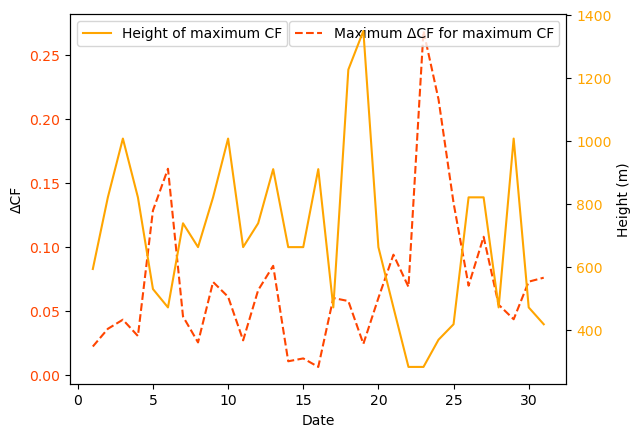

In [26]:
days = np.arange(1,32)
CLmaximum = np.array(CLmaximum)
heightmaximum = np.array(heightmaximum)

fig, ax = plt.subplots()

ax.plot(days,CLmaximum,label="Maximum ΔCF for maximum CF",color='orangered',linestyle="dashed")
ax.tick_params(axis='y', labelcolor='orangered')
ax2 = ax.twinx()

ax2.plot(days,heightmaximum, label='Height of maximum CF',color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax.set_ylabel("ΔCF")
ax2.set_ylabel("Height (m)")
ax.set_xlabel("Date")
ax.legend(loc='upper right')
ax2.legend(loc='upper left')
plt.savefig('maximumCLdiffjanuary.jpg',dpi=300) #save the figure

# plt.legend()


# Maximum height and peak January

The directories from below should be run and then you can use the code from above to plot the maximum height and peak of January

In [ ]:
directory1 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202001*.1hr.nc"
directory2 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202001*.1hr.nc"

## Minimum height and peak

#### Calculation of the minimum value of CL and the height of the minimum value

In [38]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
CLminimum = []
heightminimum = []
for month in months:
    height = height[:60] #the height for which the difference in cloud fraction is the greatest, below 3000 m
    CL = np.array(avgcl_wfp[month]) - np.array(avgcl_ctl[month])
    CL = CL[:60]
    CL = np.array(CL)
    CLmin = np.min(CL)
    CLminimum.append(CLmin)
    indexmin = np.where(CL == np.min(CL))
    heightmin = height[int(indexmin[1])]
    heightminimum.append(heightmin)
    
print(CLminimum)
print(heightminimum)
indexmin

[4]
[5]
[6]
[34]
[0]
[0]
[6]
[54]
[0]
[42]
[6]
[7]
[-0.03131152221422857, -0.009453509448416487, -0.006785743742451595, -0.002253053389537102, -0.0016212422484495489, -0.019071918302210472, -0.0038881171946665927, -0.0038815712947754405, -0.01508670031788351, -0.007197809646463688, -0.00803087022997866, -0.010440165247281738]
[118.54292, 146.79604, 176.98517, 3416.9814, 17.501976, 17.501976, 176.98517, 11381.548, 17.501976, 5822.274, 176.98517, 209.45349]


(array([0], dtype=int64), array([7], dtype=int64))

#### Plot the minimum

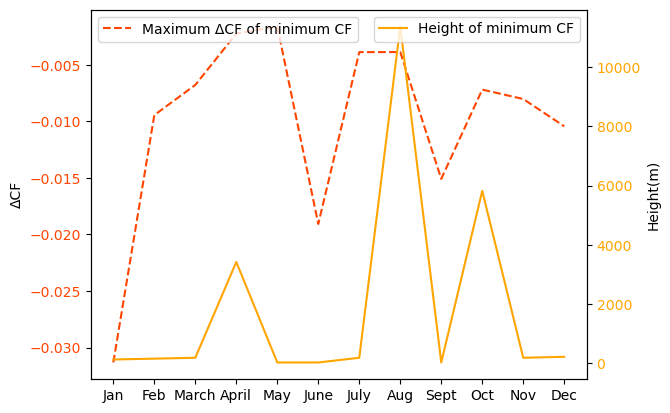

In [39]:
months = ["Jan","Feb","March","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
months = np.array(months)
CLminimum = np.array(CLminimum)
heightminimum = np.array(heightminimum)

fig, ax = plt.subplots()

ax.plot(months,CLminimum,label="Maximum ΔCF of minimum CF",color='orangered',linestyle='dashed')
ax.tick_params(axis='y', labelcolor='orangered')
ax2 = ax.twinx()

ax2.plot(months,heightminimum, color='orange',label='Height of minimum CF')
ax2.tick_params(axis='y', labelcolor='orange')

ax.set_ylabel("ΔCF")
ax2.set_ylabel("Height(m)")
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

# plt.legend()
# ax.set_xlabel()
# plt.title("Difference in minimum CL and height")

plt.savefig('diffminCLmonths.jpg',dpi=300) #save the figure

## January and December

#### January

In [40]:
directory1 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202001*.1hr.nc"
directory2 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202001*.1hr.nc"

#### December

In [37]:
directory1 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202012*.1hr.nc"
directory2 = "E:/data/german_bight/CL/cl.Slev.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202012*.1hr.nc"

#### Code om minimum and height te bepalen (werkt voor zowel dec als jan)

In [41]:
dataCTL = nc_read(directory1)
dataWFP = nc_read(directory2)

In [42]:
daysCTL = []
daysWFP = []
for i in range(1,32):
    dayselCTL = dataCTL.isel(time=(dataCTL.time.dt.day == i))
    dayselmeanCTL = dayselCTL.mean(dim="time")
    daysCTL.append(dayselmeanCTL)
    dayselmeanCTL.load()
    
    dayselWFP = dataWFP.isel(time=(dataWFP.time.dt.day == i))
    dayselmeanWFP = dayselWFP.mean(dim="time")
    dayselmeanWFP.load()
    daysWFP.append(dayselmeanWFP)

In [43]:
avgcl_wfp = {}
avgcl_ctl = {}

for i in range(31):
    avgcl_wfp[i] = []
    _wfp = []
    
    avgcl_ctl[i] = []
    _ctl = []
    for j in range(65):
        WFPlevels = daysWFP[i].isel(lev=64-j)
        maskwfp = WFPlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values
        sumCLwfp = np.sum(maskwfp)
        sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
        avgCLwfp = sumCLwfp/sumturbines
        _wfp.append(avgCLwfp)
        
        CTLlevels = daysCTL[i].isel(lev=64-j)
        maskctl = CTLlevels.cl.values*mask_type900901.__xarray_dataarray_variable__.values
        sumCLctl = np.sum(maskctl)
        avgCLctl = sumCLctl/sumturbines
        _ctl.append(avgCLctl)
    avgcl_wfp[i].append(_wfp)
    avgcl_ctl[i].append(_ctl)

In [44]:
CLminimum = []
heightminimum = []
for i in range(31):
    height = height[:50] #the height for which the difference in cloud fraction is the greatest, below 3000 m
    CL = np.array(avgcl_wfp[i]) - np.array(avgcl_ctl[i])
    CL = CL[:50]
    CL = np.array(CL)
    CLmin = np.min(CL)
    CLminimum.append(CLmin)
    indexmin = np.where(CL == np.min(CL))
    print(indexmin[1])
    heightmin = height[indexmin[1]]
    
    heightminimum.append(heightmin)

[9]
[10]
[7]
[45]
[9]
[7]
[9]
[1]
[2]
[31]
[10]
[6]
[13]
[6]
[6]
[10]
[6]
[46]
[10]
[10]
[5]
[2]
[3]
[4]
[6]
[6]
[7]
[41]
[48]
[5]
[5]


In [ ]:
CLminimum

In [ ]:
np.where(CLminimum == np.min(CLminimum))

In [ ]:
# CLminimum

In [ ]:
# reverse_order_height = np.sort(heightminimum)[::-1]
# print(reverse_order_height)
# reverse_order_peak = np.sort(CLmaximum)[::-1]
# print(reverse_order_peak)

# indexmax = np.where(np.array(CLmaximum)>0.08)
# # print(CLmaximum)
# # indexmax
# np.mean(heightmaximum)
# # heightmaximum

In [ ]:
# indexmax = np.where(np.array(CLmaximum)>0.08)
# print(indexmax)
# CLmaximum

In [ ]:
np.mean(heightminimum)

In [ ]:
np.min(CLminimum)

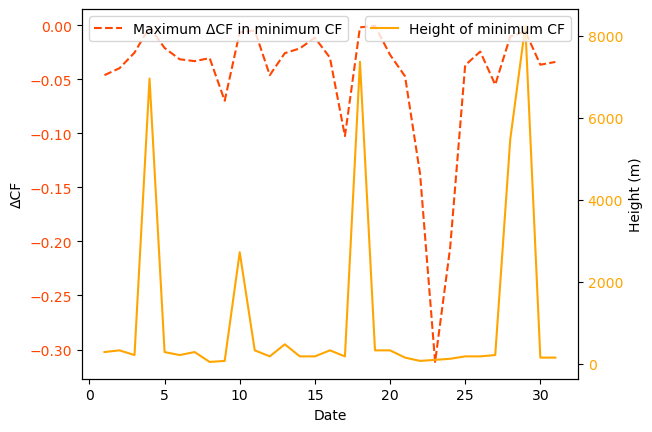

In [47]:
days = np.arange(1,32)
CLminimum = np.array(CLminimum)
heightminimum = np.array(heightminimum)

fig, ax = plt.subplots()

ax.plot(days,CLminimum,label="Maximum ΔCF in minimum CF",color='orangered',linestyle="dashed")
ax.tick_params(axis='y', labelcolor='orangered')
# plt.legend()
ax2 = ax.twinx()

ax2.plot(days,heightminimum, label='Height of minimum CF',color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax.set_ylabel("ΔCF")
ax2.set_ylabel("Height (m)")
ax.set_xlabel("Date")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
# ax2.legend()
# plt.title("Height of cloud and difference in minimum CL in January")
plt.savefig('minimumCLdiffjan.jpg',dpi=300) #save the figure

# plt.legend()
